<a href="https://colab.research.google.com/github/alberzenon/TecMilenio/blob/main/ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA

In [ ]:
np.random.seed(0)
n_muestras = 2000
tiempo = np.linspace(0,8,n_muestras)

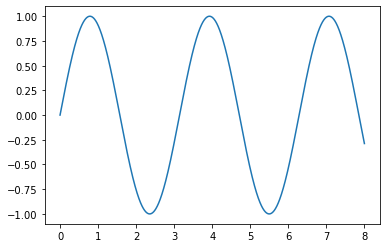

In [ ]:
s1 = np.sin(2*tiempo)

plt.plot(tiempo,s1)
plt.show()

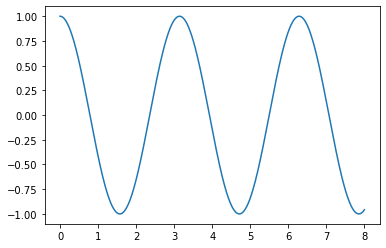

In [ ]:
s2 = np.cos(2*tiempo)

plt.plot(tiempo,s2)
plt.show()

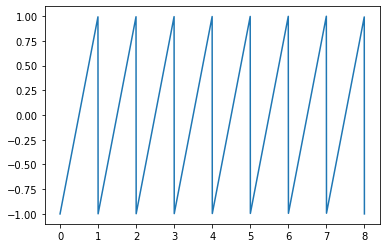

In [ ]:
s3 = signal.sawtooth(2*np.pi*tiempo)

plt.plot(tiempo,s3)
plt.show()

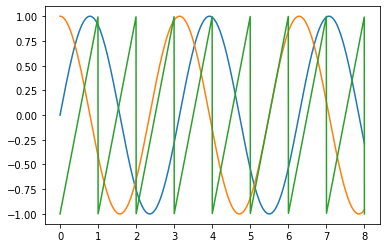

In [ ]:
S = np.c_[s1,s2,s3]

plt.plot(tiempo,S)
plt.show()

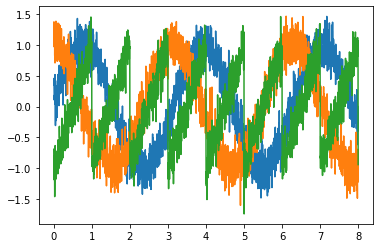

In [ ]:
S += 0.2*np.random.normal(size=S.shape)

plt.plot(tiempo,S)
plt.show()

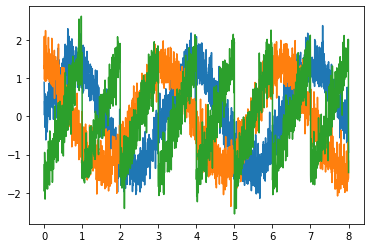

In [ ]:
S /=S.std(axis=0)

plt.plot(tiempo,S)
plt.show()

In [ ]:
A = np.array([[1,1,1],[0.5,2,1.0],[1.5,1.0,2.0]])

print(A)

[[1.  1.  1. ]
 [0.5 2.  1. ]
 [1.5 1.  2. ]]


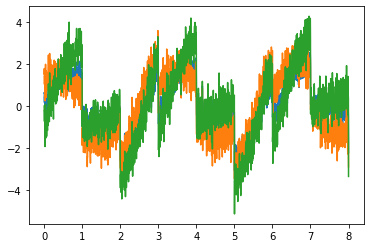

In [ ]:
X = np.dot(S, A.T)

plt.plot(tiempo,X)
plt.show()

In [ ]:
X.shape

(2000, 3)

Recuperación de la Señal

In [ ]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
A_ = ica.mixing_

In [ ]:
A_

array([[-17.31036051,  23.70703859,  42.07992413],
       [-13.35576756,  -0.55219858,  69.19014286],
       [-42.45640172,  41.17928966,  48.64991496]])

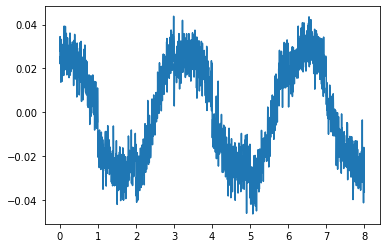

In [ ]:
plt.plot(tiempo,S_[:,2])
plt.show()

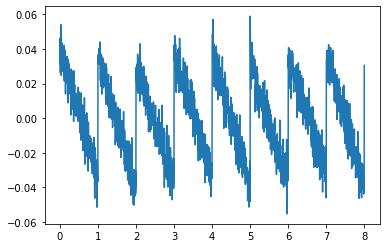

In [ ]:
plt.plot(tiempo,S_[:,0])
plt.show()

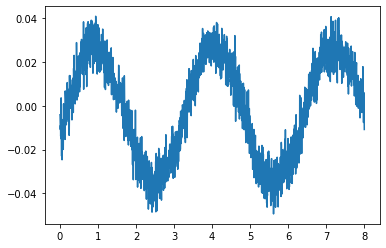

In [ ]:
plt.plot(tiempo,S_[:,1])
plt.show()

In [ ]:
print (np.allclose(X, np.dot(S_,A_.T)+ica.mean_))

True


In [ ]:
ica_2 = FastICA(n_components=2)
S_2 = ica_2.fit_transform(X)
A_2 = ica_2.mixing_

In [ ]:
S_2.shape

(2000, 2)

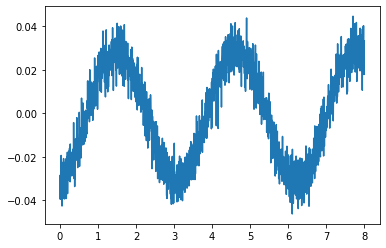

In [ ]:
plt.plot(tiempo,S_2[:,1])
plt.show()

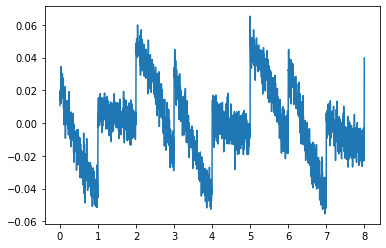

In [ ]:
plt.plot(tiempo,S_2[:,0])
plt.show()

In [ ]:
ica_3 = FastICA(n_components=4)
S_3 = ica_3.fit_transform(X)
A_3 = ica_3.mixing_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:520: UserWarning: n_components is too large: it will be set to 3
  "n_components is too large: it will be set to %s" % n_components


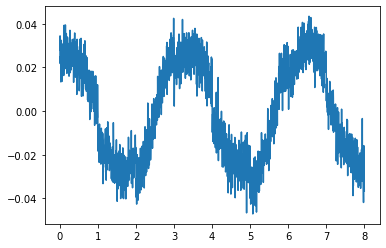

In [ ]:
plt.plot(tiempo,S_3[:,0])
plt.show()

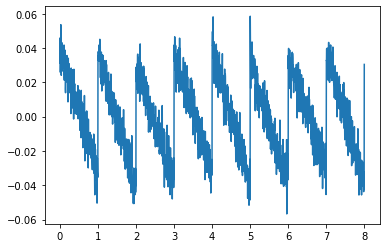

In [ ]:
plt.plot(tiempo,S_3[:,1])
plt.show()

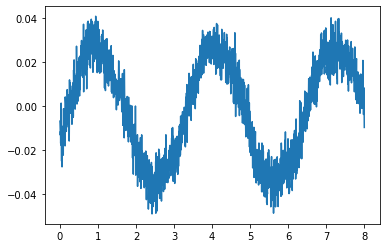

In [ ]:
plt.plot(tiempo,S_3[:,2])
plt.show()